In [14]:
import pickle
import os
events = pickle.load(open('../data/events.pkl', "rb"))

In [15]:
class_map = {}
for i, key in enumerate(events.keys()):
    class_map[key] = i
    
reverse_class_map = {}
for key, val in class_map.items():
    reverse_class_map[val] = key
    
print (class_map)
print (reverse_class_map)

{'other 2-pointer success': 0, 'steal success': 1, 'other 2-pointer failure': 2, 'slam dunk failure': 3, 'slam dunk success': 4, 'layup success': 5, 'free-throw success': 6, '3-pointer success': 7, '3-pointer failure': 8, 'free-throw failure': 9, 'layup failure': 10}
{0: 'other 2-pointer success', 1: 'steal success', 2: 'other 2-pointer failure', 3: 'slam dunk failure', 4: 'slam dunk success', 5: 'layup success', 6: 'free-throw success', 7: '3-pointer success', 8: '3-pointer failure', 9: 'free-throw failure', 10: 'layup failure'}


In [114]:
for chunk in os.listdir('all_data'):
    if chunk[0] == '.':
        # ignore hidden files
        continue

    data_name = 'all_data/{}/video-data'.format(chunk)
    actions_pkl_name = 'all_data/{}/actions-info-dict.pkl'.format(chunk)

    events = pickle.load(open(actions_pkl_name, "rb"))

    for action, clips in events.items():
        if action == 'steal success':
            print (chunk, clips)
            break

andrew-laptop-1 ['E9a-WImIqRI/clip_2.mp4', '5w4QpuGJLj4/clip_3.mp4', 'Q8EjZ-UN53Q/clip_1.mp4', 'MmJ81b2uUhI/clip_3.mp4', 'y_QA5_30ZDI/clip_1.mp4', '4YZd7zvVmC4/clip_1.mp4', 'CZk25TdOkoc/clip_2.mp4', 'GddyPzIOF_M/clip_1.mp4', 'bxZepPt-WP8/clip_1.mp4', 'bxZepPt-WP8/clip_4.mp4', 'j7Lsh86FqTM/clip_1.mp4', 'cr3caxj-4E4/clip_1.mp4', 'gIgBRqQhSDs/clip_1.mp4', 'cOpWL8_l-BA/clip_2.mp4', 'gYe1Adcc-XM/clip_2.mp4', 'cOpWL8_l-BA/clip_1.mp4', '2H45XQEjFQ8/clip_2.mp4', 'ipH8lf68nZU/clip_2.mp4', 'xs8qYR7EXVY/clip_2.mp4', 'DLLPlG5er6I/clip_3.mp4', 'OVRp7_wN3Ys/clip_1.mp4', '8-pWoWP9xLQ/clip_2.mp4', 'gChs1VYhpIY/clip_3.mp4', 'kJFBSK-qX58/clip_2.mp4', 'zFga1xOchcQ/clip_1.mp4', '0VhsXKRmKfU/clip_1.mp4', '3O0Tnin0-RQ/clip_2.mp4', 'qnBwuxFDxlU/clip_3.mp4', 'Q7AC2wG3S7o/clip_5.mp4', 'I9923c1yEXQ/clip_1.mp4', 'qnBwuxFDxlU/clip_2.mp4', 'Q7AC2wG3S7o/clip_6.mp4', 'gIgBRqQhSDs/clip_7.mp4', 'gIgBRqQhSDs/clip_4.mp4', 'QktoYnhOZe8/clip_2.mp4', 'Vq_mjlO51vA/clip_1.mp4', 'QktoYnhOZe8/clip_3.mp4', 'M8-8SZfMNQ0/clip_1.m

In [18]:
# import skvideo.io
# import skvideo.datasets
# import numpy as np
# import os
# import pickle
# import random
# import csv



# count = 0
# with open('video-train.csv', 'w') as train:
#     with open('video-val.csv', 'w') as val:
#         with open('video-test.csv', 'w') as test:
#             train_writer = csv.writer(train)
#             val_writer = csv.writer(val)
#             test_writer = csv.writer(test)
            
#             train_writer.writerow(['file', 'action'])
#             val_writer.writerow(['file', 'action'])
#             test_writer.writerow(['file', 'action'])

#             for chunk in os.listdir('all_data'):
#                 if chunk[0] == '.':
#                     # ignore hidden files
#                     continue

#                 data_name = 'all_data/{}/video-data'.format(chunk)
#                 actions_pkl_name = 'all_data/{}/actions-info-dict.pkl'.format(chunk)

#                 events = pickle.load(open(actions_pkl_name, "rb"))

#                 for action, clips in events.items():
                    
#                     output_class = class_map[action]

#                     for clip in clips:
#                         fullname = 'all_data/{}/video-data/{}'.format(chunk, clip)

# #                         # random
# #                         if random.random() > 1/3:
# #                             continue
                        
#                         # check filesize
#                         if not os.path.isfile(fullname):
#                             continue
#                         elif os.path.getsize(fullname) < 1000:
#                             # delete file
#                             os.remove(fullname)
#                             print ('deleted {}'.format(fullname))
#                             continue
                    
#                         count += 1
                        
#                         # 80% of the data for training, 5% for validation, and 15% for test
#                         prob = random.random()

#                         if prob < 0.80:
#                             train_writer.writerow([fullname, output_class])
#                         elif prob < 0.85:
#                             val_writer.writerow([fullname, output_class])
#                         else:
#                             test_writer.writerow([fullname, output_class])
                            
# print (count)

10406


In [3]:
import skvideo.io
import skvideo.datasets
import numpy as np

videodata = skvideo.io.vread('all_data/andrew-laptop-1/video-data/-VcfnuYRhMU/clip_2.mp4')
print(videodata.shape)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import scipy.misc

num_frames = videodata.shape[0]

fig=plt.figure(figsize=(80, 80))
columns = 1
rows = 6
for i in range(num_frames):
    if i % 3 == 0: 
        frame = videodata[i, :, :, :]
#         a = fig.add_subplot(rows, columns, i + 1)
#         a.set_title('Image {}'.format(i + 1))
        
        scipy.misc.imsave('image-{}.png'.format(i), frame)
#         plt.imshow(frame)
# for i in range(num_frames):
#     frame = videodata[i, :, :, :]
#     a = fig.add_subplot(rows, columns, i + 1)
#     a.set_title('Image {}'.format(i + 1))
#     plt.imshow(frame)
        
plt.show()


(18, 160, 160, 3)


/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


<Figure size 8000x8000 with 0 Axes>

In [5]:
# import pandas as pd
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import matplotlib.patches as patches

# datadir = '../resized-data-160'

# # game name, clip name, img number
# game_name = '0En5pOUZN5M'
# clip_name = 'clip_46'
# img_num = 3

# img_path = '/'.join((datadir, game_name, clip_name, '{:02}.png'.format(img_num)))
# bb_path =  '/'.join((datadir, game_name, clip_name, '{:02}_info.csv'.format(img_num)))

# # bbs_data = pd.read_csv(bb_path)
# img = mpimg.imread(img_path)

# fig = plt.figure(frameon=False)

# ax = plt.Axes(fig, [0., 0., 1., 1.,])
# ax.set_axis_off()

# fig.add_axes(ax)
# ax.imshow(img)


# # for _, bbox in bbs_data.iterrows():
# #     rect = patches.Rectangle((bbox.x, bbox.y),
# #                             bbox.w, bbox.h, linewidth=3, edgecolor='r',
# #                             facecolor='none')
# #     ax.add_patch(rect)

# # fig.savefig('test.png')    
    
# plt.show()

In [6]:
# ###
# ### RUN ONLY IF YOU WANT TO CREATE RESIZED IMAGES
# ###
# import csv
# from PIL import Image
# import random
# import os
# from __future__ import print_function, division
# import os
# import torch
# import pandas as pd
# from skimage import io, transform
# import numpy as np
# import matplotlib.pyplot as plt
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, utils
# from PIL import Image
# import cv2

# RESIZE = 160

# # write in a csv file for single image
# count = 0
# for action, clips in events.items():
#     output_class = class_map[action]

#     for clip in clips:
#         for file in os.listdir('../data/' + clip):
#             filename = os.fsdecode(file)
#             if filename.endswith(".png"):
#                 # read, resize and rewrite
#                 fullname = '../data/' + clip + '/' + filename
                
#                 image = Image.open(fullname)
#                 image = image.resize((RESIZE, RESIZE), Image.ANTIALIAS)
        
#                 newname = '../resized-data-{}/'.format(RESIZE) + clip + '/' + filename
                
#                 if not os.path.exists(os.path.dirname(newname)):
#                     try:
#                         os.makedirs(os.path.dirname(newname))
#                         # rewrite
#                     except: # Guard against race condition
#                         raise
                        
#                 try:
#                     image.save(newname, quality=95)
#                     count += 1
#                 except:
#                     print ('Failed on IMG {}'.format(fullname))
                    
#                 if count % 1000 == 0:
#                     print (count)

In [7]:
# ## CREATE VIDEOS 
# import csv
# import random
# import os
# from __future__ import print_function, division
# import torch
# import pandas as pd
# from skimage import io, transform
# import numpy as np
# import matplotlib.pyplot as plt
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, utils
# from PIL import Image
# import cv2
# from tempfile import TemporaryFile

# count = 0
# SIZE = 160

# for action, clips in events.items():
#     output_class = class_map[action]

#     for clip in clips:
#         # loop through clips, create an image numpy matrix
#         video = None
#         num_images = 0
#         for file in sorted(os.listdir('../resized-data-{}/'.format(SIZE) + clip)):
#             filename = os.fsdecode(file)

#             if filename.endswith(".png"):
#                 num_images += 1
                
#         if num_images != 20:
#             continue                
        
#         for file in sorted(os.listdir('../resized-data-{}/'.format(SIZE) + clip)):
#             filename = os.fsdecode(file)

#             if filename.endswith(".png"):            
#                 # read, resize and rewrite
#                 fullname = '../resized-data-160/'.format(SIZE) + clip + '/' + filename
#                 im = io.imread(fullname)
                
#                 # move RGB axis to 0, resize
#                 im = transform.resize(im, (SIZE, SIZE, 3))
#                 image = np.moveaxis(im, 2, 0)
#                 reshaped_image = np.reshape(image, (3, 1, SIZE, SIZE))
                
#                 if video is None:
#                     video = reshaped_image
#                 else:
#                     video = np.concatenate((video, reshaped_image), axis=1)
        
#         newname = '../data-{}-3d/'.format(SIZE) + clip         

#         if not os.path.exists(os.path.dirname(newname)):
#             try:
#                 os.makedirs(os.path.dirname(newname))
#                 # rewrite
#             except: # Guard against race condition
#                 raise
                        
#         try:
#             np.save(newname, video)
#             count += 1
            
# #             # TEMP TEST
# #             output = np.load(newname + '.npy')
#         except:
#             print ('Failed on IMG {}'.format(fullname))

#         if count % 25 == 0:
#             print (count)  
        
# print (count)

In [8]:
# import subprocess

# def convert(milliseconds):
#     seconds = milliseconds / 1e3
#     minutes = seconds // 60
#     hours = minutes // 60

#     return "%02d:%02d:%02d.%03d" % (hours, minutes % 60, seconds % 60, milliseconds % 1000)

# counts = {}

# with open('bball_dataset_april_4.csv', 'r') as datafile:
#     for line in datafile:
#         (vid_id, width, height, clip_start, clip_end, event_start, event_end, ball_x, ball_y, label, type) = line.split(',')

#         if vid_id not in counts:
#             counts[vid_id] = 0

#         counts[vid_id] += 1

#         url = 'https://www.youtube.com/watch?v={}'.format(vid_id)

#         event_end = float(event_end)
#         start = convert(event_end - 2000)

#         newname = 'video-data/{}/clip_{}.mp4'.format(vid_id, counts[vid_id])

#         if not os.path.exists(os.path.dirname(newname)):
#             try:
#                 os.makedirs(os.path.dirname(newname))
#                 # rewrite
#             except: # Guard against race condition
#                 raise
                        
#         # take 4 second clip 6 fps
#         subprocess.check_output('ffmpeg -i $(youtube-dl -f "best[height=360,width=490]" --get-url {}) \
#             -ss {} -t 00:00:02.000 -vf fps="fps=6" -an -s 160x160 \
#             {}'.format(url, start, newname), shell=True)

#         break

In [16]:
# import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import sampler
import pandas as pd

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import skvideo.io
import skvideo.datasets
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# LOADER FOR VIDEOS
class VideoBasketballDataset(Dataset):

    def __init__(self, csv_file, train=False, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        # randomize
        self.dataframe = pd.read_csv(csv_file)        
        self.transform = transform
        self.train = train

    def __len__(self):
        # return number of rows in csv file
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        vid_name = self.dataframe.iloc[idx, 0]
        action = self.dataframe.iloc[idx, 1]

        video = skvideo.io.vread(vid_name, num_frames=18)
        video = np.moveaxis(video, 3, 0)

        # should be MEAN, VAR
        if self.transform:
            MEAN, VAR = transform
            
            # normalize
            video -= MEAN
            video /= (VAR ** 0.5)

        return (video, action)

In [17]:
train_dataset = VideoBasketballDataset(csv_file='video-train.csv', train=True)
val_dataset = VideoBasketballDataset(csv_file='video-val.csv', train=True)
test_dataset = VideoBasketballDataset(csv_file='video-test.csv', train=False)

print (len(train_dataset), len(val_dataset), len(test_dataset))

8309 523 1574


In [5]:
data =  np.zeros((len(train_dataset), 3, 18, 160, 160))

for i, (video, action) in enumerate(train_dataset):
    data[i] = video
    
    if i != 0 and i % 100 == 0:
        print (i)
        
mean = np.mean(data, axis=(0,2,3,4))
var = np.var(data, axis=(0,2,3,4))

print ('mean', mean)
print ('var', var)

MemoryError: 

In [12]:
## CONSTANT MEAN AND VAR
MEAN = np.asarray([0.4846969,  0.42418167, 0.38360563]).reshape(3, 1, 1, 1)
VAR = np.asarray([0.09581404, 0.06945298, 0.04741817]).reshape(3, 1, 1,1)

In [56]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np
# import os

# # VIDEO NP ARRAY
# video = '../data-160-3d/0aWfrZAM6Q8/clip_12.npy'
# video_array = np.load(video)

# print (video_array.shape)

# fig=plt.figure(figsize=(128, 128))
# columns = 1
# rows = 20
# for i in range(20):
#     frame = video_array[:, i, :, :]
#     img = np.moveaxis(frame, 0, 2)
#     a = fig.add_subplot(rows, columns, i + 1)
#     a.set_title('Image {}'.format(i + 1))
#     plt.imshow(img)

# plt.show()

In [58]:
# # write in a csv file for single image
# # FOR VIDEOS
# import csv
# import random
# import os

# SIZE = 160

# with open('video-train.csv', 'w') as train:
#     with open('video-val.csv', 'w') as val:
#         with open('video-test.csv', 'w') as test:
#             train_writer = csv.writer(train)
#             val_writer = csv.writer(val)
#             test_writer = csv.writer(test)
            
#             train_writer.writerow(['file', 'action'])
#             val_writer.writerow(['file', 'action'])
#             test_writer.writerow(['file', 'action'])

#             for action, clips in sorted(events.items(), key=lambda pair : class_map[pair[0]]):                
#                 output_class = class_map[action]
                
#                 # randomly distribute clips
#                 for clip in clips:
#                     video_name = '../data-{}-3d/'.format(SIZE) + clip + '.npy'  
                    
#                     if not os.path.isfile(video_name):
#                         continue
                    
#                     prob = random.random()

#                     if prob < 0.70:
#                         train_writer.writerow([video_name, output_class])
#                     elif prob < 0.85:
#                         val_writer.writerow([video_name, output_class])
#                     else:
#                         test_writer.writerow([video_name, output_class])


In [6]:
# couldn't normalize due to different image sizes
NUM_TRAIN = len(train_dataset)
NUM_VAL = len(val_dataset)
NUM_TEST = len(test_dataset)

print (NUM_TRAIN, NUM_VAL, NUM_TEST)

BATCH_SIZE = 16

loader_train = DataLoader(train_dataset, batch_size=BATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
loader_val = DataLoader(val_dataset, batch_size=BATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
loader_test = DataLoader(test_dataset, batch_size=BATCH_SIZE)

8309 523 1574


In [18]:
import torch


def train_part34(model, optimizer, epochs=1, verbose=False, print_train=False):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % 100 == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model, verbose=verbose)
                if print_train:
                    check_accuracy_part34(loader_train, model, verbose=verbose)
                print()
                
                
def check_accuracy_part34(loader, model, verbose=False):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    
    class_matrix = np.zeros((11, 11))
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            
            for i in range(len(y)):
                actual = y[i]
                pred = preds[i]
                
                class_matrix[pred][actual] += 1

        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        
        if verbose:
            print('------')
            for i in range(11):
                label = reverse_class_map[i]

                # recall, precision for each class
                # precision: correctly declared i out of all instances where the algorithm declared i
                # recall: correctly declared i out of all of the cases where the true state of the world is i.
                correct = class_matrix[i][i]
                num_predicted = np.sum(class_matrix[i,:]) 
                num_actual = np.sum(class_matrix[:, i])

                print ('%30s:    Recall = %3d / %3d = (%.2f)    Precision = %3d / %3d = (%.2f)' % (
                    label, correct, num_actual, correct / num_actual * 100, correct, num_predicted,
                    correct / num_predicted * 100))
        
    return class_matrix
    
    
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 20

print('using device:', device)

using device: cuda


In [19]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

# We need to wrap `flatten` function in a module in order to stack it
# in nn.Sequential
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

In [15]:
# using video data
import torch.nn.functional as F  # useful stateless functions

learning_rate = 1e-6

model = nn.Sequential(
    Flatten(),
    nn.Linear(3 * 20 * 256 * 256, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 11),
)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10)

Iteration 0, loss = 2.4149
Checking accuracy on validation set
Got 34 / 335 correct (10.15)

Iteration 20, loss = 2.4501
Checking accuracy on validation set
Got 102 / 335 correct (30.45)

Iteration 40, loss = 2.3058
Checking accuracy on validation set
Got 136 / 335 correct (40.60)

Iteration 0, loss = 1.9963
Checking accuracy on validation set
Got 146 / 335 correct (43.58)

Iteration 20, loss = 1.9927
Checking accuracy on validation set
Got 198 / 335 correct (59.10)

Iteration 40, loss = 1.5398
Checking accuracy on validation set
Got 235 / 335 correct (70.15)

Iteration 0, loss = 1.6584
Checking accuracy on validation set
Got 236 / 335 correct (70.45)

Iteration 20, loss = 0.8831
Checking accuracy on validation set
Got 260 / 335 correct (77.61)

Iteration 40, loss = 1.4628
Checking accuracy on validation set
Got 293 / 335 correct (87.46)

Iteration 0, loss = 0.9910
Checking accuracy on validation set
Got 302 / 335 correct (90.15)

Iteration 20, loss = 0.8789
Checking accuracy on valida

KeyboardInterrupt: 

In [20]:
def save_model(model, filename, overwrite=False):
    if not os.path.exists('models/'):
        try:
            os.makedirs(os.path.dirname('models/'))
            # rewrite
        except: # Guard against race condition
            print ('Failed!')
            return
        
    if not overwrite and os.path.isfile('models/{}'.format(filename)):
        print ('That file already exists. Please use another file name.')
        return
        
    torch.save(model.state_dict(), 'models/{}'.format(filename))

    print ('Saved parameters of models/{} successfully!'.format(filename))
    
def load_model(model, filename):
    model.load_state_dict(torch.load('models/{}'.format(filename)))
    return model

In [21]:
from __future__ import print_function
from p3d_model import *

def get_pretrained_C3D():
    model = P3D199(pretrained=True, num_classes=400)
        
    # freeze layers
    for param in model.parameters():
        param.requires_grad = False

    # 11 classes instead of 400 classes
    model.fc = torch.nn.Linear(2048,11)
    
    if torch.cuda.is_available():
        print ('Using CUDA!\n')
        model = model.cuda()    
    
    return model

In [18]:
## ATTEMPT 1:
## 
model = get_pretrained_C3D()

# fine tune last 2 layers
for param in model.layer4.parameters():
    param.requires_grad = True
    
learning_rate = 5e-5
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10)

Using CUDA!



RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1524590031827/work/aten/src/THC/generic/THCStorage.cu:58

In [59]:
# store previous model in pkl
save_model(model, 'C3D-P3D199-attempt-1', overwrite=True)

Saved parameters of models/C3D-P3D199-attempt-1 successfully!


In [62]:
loaded_model = get_pretrained_C3D()

# fine tune last 2
for param in loaded_model.layer4.parameters():
    param.requires_grad = True

loaded_model = load_model(loaded_model, 'C3D-P3D199-attempt-1')

# check test set
check_accuracy_part34(loader_test, loaded_model, verbose=True)

Using CUDA!

Checking accuracy on test set
Got 486 / 1574 correct (30.88)
------
       other 2-pointer success:    Recall =   0 / 151 = (0.00)    Precision =   0 /   1 = (0.00)
                 steal success:    Recall = 163 / 262 = (62.21)    Precision = 163 / 357 = (45.66)
       other 2-pointer failure:    Recall = 137 / 291 = (47.08)    Precision = 137 / 558 = (24.55)
             slam dunk failure:    Recall =   0 /   8 = (0.00)    Precision =   0 /   0 = (nan)
             slam dunk success:    Recall =   0 /  33 = (0.00)    Precision =   0 /   0 = (nan)
                 layup success:    Recall =  19 / 152 = (12.50)    Precision =  19 /  99 = (19.19)
            free-throw success:    Recall =  21 /  65 = (32.31)    Precision =  21 /  51 = (41.18)
             3-pointer success:    Recall =   5 / 146 = (3.42)    Precision =   5 /  29 = (17.24)
             3-pointer failure:    Recall = 114 / 260 = (43.85)    Precision = 114 / 387 = (29.46)
            free-throw failure:    Re

In [112]:
class_matrix = check_accuracy_part34(loader_test, loaded_model, verbose=True)
print (class_matrix)

Checking accuracy on test set
Got 486 / 1574 correct (30.88)
------
       other 2-pointer success:    Recall =   0 / 151 = (0.00)    Precision =   0 /   1 = (0.00)
                 steal success:    Recall = 163 / 262 = (62.21)    Precision = 163 / 357 = (45.66)
       other 2-pointer failure:    Recall = 137 / 291 = (47.08)    Precision = 137 / 558 = (24.55)
             slam dunk failure:    Recall =   0 /   8 = (0.00)    Precision =   0 /   0 = (nan)
             slam dunk success:    Recall =   0 /  33 = (0.00)    Precision =   0 /   0 = (nan)
                 layup success:    Recall =  19 / 152 = (12.50)    Precision =  19 /  99 = (19.19)
            free-throw success:    Recall =  21 /  65 = (32.31)    Precision =  21 /  51 = (41.18)
             3-pointer success:    Recall =   5 / 146 = (3.42)    Precision =   5 /  29 = (17.24)
             3-pointer failure:    Recall = 114 / 260 = (43.85)    Precision = 114 / 387 = (29.46)
            free-throw failure:    Recall =  19 / 

In [11]:
model = get_pretrained_C3D()

# fine tune last 2 layers
for param in model.layer4.parameters():
    param.requires_grad = True
    
learning_rate = 5e-5
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10)

Using CUDA!

Iteration 0, loss = 2.3516
Checking accuracy on validation set
Got 83 / 523 correct (15.87)
Checking accuracy on validation set
Got 1391 / 8309 correct (16.74)

Iteration 20, loss = 2.3066
Checking accuracy on validation set
Got 59 / 523 correct (11.28)
Checking accuracy on validation set
Got 77 / 523 correct (14.72)
Checking accuracy on validation set
Got 1280 / 8309 correct (15.40)

Iteration 60, loss = 2.4206
Checking accuracy on validation set
Got 96 / 523 correct (18.36)
Checking accuracy on validation set
Got 1466 / 8309 correct (17.64)

Iteration 80, loss = 2.1873
Checking accuracy on validation set
Got 110 / 523 correct (21.03)
Checking accuracy on validation set
Got 1694 / 8309 correct (20.39)

Iteration 100, loss = 1.9370
Checking accuracy on validation set
Got 121 / 523 correct (23.14)
Checking accuracy on validation set
Got 1930 / 8309 correct (23.23)

Iteration 120, loss = 1.6935
Checking accuracy on validation set
Got 125 / 523 correct (23.90)
Checking accura

KeyboardInterrupt: 

In [14]:
## ATTEMPT 2:
## 
model = get_pretrained_C3D()

# fine tune last 2 layers
for param in model.layer4.parameters():
    param.requires_grad = True
    
learning_rate = 5e-5
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10)

Using CUDA!

Iteration 0, loss = 2.6129
Checking accuracy on validation set
Got 37 / 523 correct (7.07)
Checking accuracy on validation set
Got 533 / 8309 correct (6.41)

Iteration 100, loss = 2.3949
Checking accuracy on validation set
Got 117 / 523 correct (22.37)
Checking accuracy on validation set
Got 2237 / 8309 correct (26.92)

Iteration 200, loss = 2.0368
Checking accuracy on validation set
Got 150 / 523 correct (28.68)
Checking accuracy on validation set
Got 2883 / 8309 correct (34.70)

Iteration 300, loss = 1.7746
Checking accuracy on validation set
Got 165 / 523 correct (31.55)
Checking accuracy on validation set
Got 3283 / 8309 correct (39.51)

Iteration 400, loss = 2.2108
Checking accuracy on validation set
Got 162 / 523 correct (30.98)
Checking accuracy on validation set
Got 3463 / 8309 correct (41.68)

Iteration 500, loss = 1.8320
Checking accuracy on validation set
Got 171 / 523 correct (32.70)
Checking accuracy on validation set
Got 3933 / 8309 correct (47.33)

Iteration

ValueError: No way to determine width or height from video. Need `-s` in `inputdict`. Consult documentation on I/O.

In [15]:
# store previous model in pkl
save_model(model, 'C3D-P3D199-attempt-2', overwrite=True)

Saved parameters of models/C3D-P3D199-attempt-2 successfully!


In [23]:
## ATTEMPT 2 CONTINUED:
## 
model = get_pretrained_C3D()

# fine tune last 2 layers
for param in model.layer4.parameters():
    param.requires_grad = True
    
load_model(model, 'C3D-P3D199-attempt-2')
    
learning_rate = 5e-5
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10, print_train=True)

Using CUDA!

Iteration 0, loss = 1.5507
Checking accuracy on validation set
Got 177 / 523 correct (33.84)
Checking accuracy on validation set
Got 4455 / 8309 correct (53.62)

Iteration 100, loss = 1.2100
Checking accuracy on validation set
Got 170 / 523 correct (32.50)
Checking accuracy on validation set
Got 4756 / 8309 correct (57.24)

Iteration 200, loss = 1.2982
Checking accuracy on validation set
Got 173 / 523 correct (33.08)
Checking accuracy on validation set
Got 5026 / 8309 correct (60.49)

Iteration 300, loss = 1.2403
Checking accuracy on validation set
Got 176 / 523 correct (33.65)
Checking accuracy on validation set


KeyboardInterrupt: 

In [24]:
# store previous model in pkl
save_model(model, 'C3D-P3D199-attempt-2-cont', overwrite=True)

Saved parameters of models/C3D-P3D199-attempt-2-cont successfully!


In [11]:
import re

def parse_output(output):
    iterations = [int(iter) for iter in re.findall(r'Iteration (\d+)', output)]
    losses = [float(loss) for loss in re.findall(r'loss = (\S+)', output)]
    accuracies = [float(accuracy) for accuracy in re.findall(r'correct [(](\S+)[)]', output)]
    
    return iterations, losses, accuracies

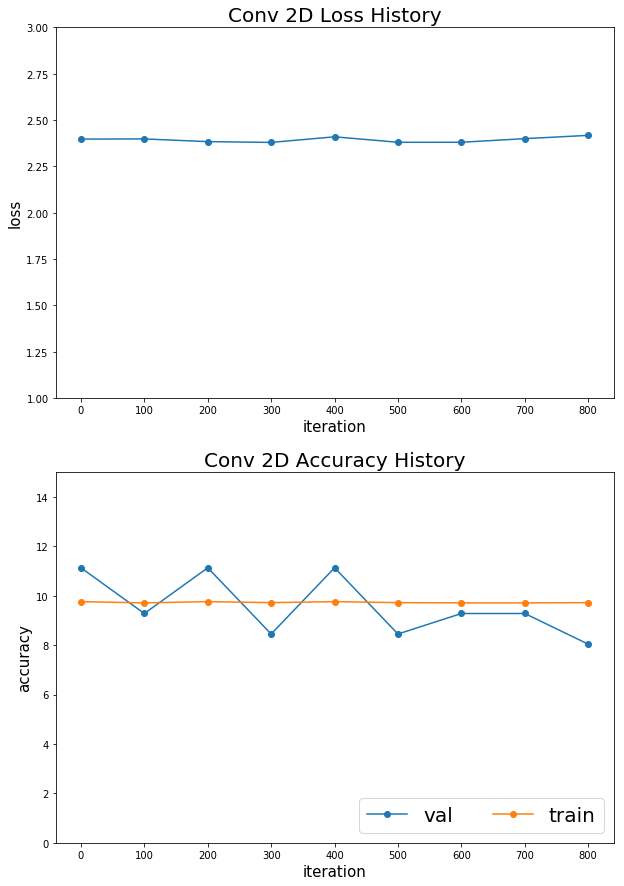

In [12]:
# ## PLOT LOSS AND ACCURACY
import random

iterations, losses, accuracies = parse_output("""
Iteration 0, loss = 2.3974
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 100, loss = 2.3982
Checking accuracy on validation set
Got 45 / 485 correct (9.28)
Checking accuracy on validation set
Got 850 / 8754 correct (9.71)

Iteration 200, loss = 2.3836
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 300, loss = 2.3794
Checking accuracy on validation set
Got 41 / 485 correct (8.45)
Checking accuracy on validation set
Got 851 / 8754 correct (9.72)

Iteration 400, loss = 2.4096
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 500, loss = 2.3801
Checking accuracy on validation set
Got 41 / 485 correct (8.45)
Checking accuracy on validation set
Got 851 / 8754 correct (9.72)

Iteration 0, loss = 2.3802
Checking accuracy on validation set
Got 45 / 485 correct (9.28)
Checking accuracy on validation set
Got 850 / 8754 correct (9.71)

Iteration 100, loss = 2.3997
Checking accuracy on validation set
Got 45 / 485 correct (9.28)
Checking accuracy on validation set
Got 850 / 8754 correct (9.71)

Iteration 200, loss = 2.4174
Checking accuracy on validation set
Got 39 / 485 correct (8.04)
Checking accuracy on validation set
Got 851 / 8754 correct (9.72)

""")

# manually handle epoch
iterations[-3:] = [600, 700, 800]
val_accuracies = [acc for i, acc in enumerate(accuracies) if i % 2 == 0]
train_accuracies = [acc for i, acc in enumerate(accuracies) if i % 2 == 1]

plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
plt.plot(iterations, losses, '-o')
plt.ylim((1, 3)) 
plt.title('Conv 2D Loss History', fontsize=20)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('loss', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(iterations, val_accuracies, '-o', label='val')
plt.plot(iterations, train_accuracies, '-o', label='train')
plt.title('Conv 2D Accuracy History', fontsize=20)
plt.ylim((0, 15)) 
plt.legend(ncol=2, loc='lower right', fontsize=20)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.show()

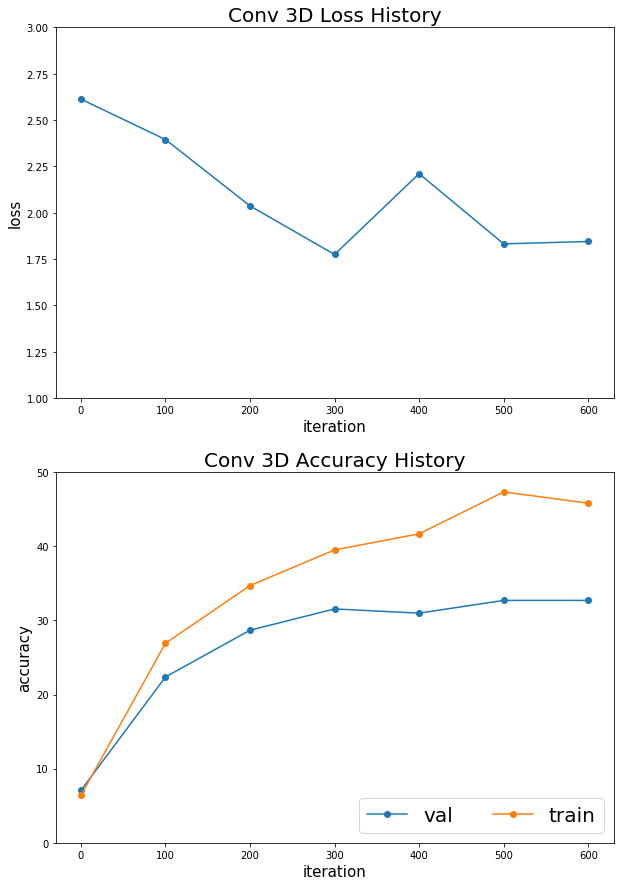

In [13]:
# ## PLOT LOSS AND ACCURACY
import random

output = """
Iteration 0, loss = 2.6129
Checking accuracy on validation set
Got 37 / 523 correct (7.07)
Checking accuracy on validation set
Got 533 / 8309 correct (6.41)

Iteration 100, loss = 2.3949
Checking accuracy on validation set
Got 117 / 523 correct (22.37)
Checking accuracy on validation set
Got 2237 / 8309 correct (26.92)

Iteration 200, loss = 2.0368
Checking accuracy on validation set
Got 150 / 523 correct (28.68)
Checking accuracy on validation set
Got 2883 / 8309 correct (34.70)

Iteration 300, loss = 1.7746
Checking accuracy on validation set
Got 165 / 523 correct (31.55)
Checking accuracy on validation set
Got 3283 / 8309 correct (39.51)

Iteration 400, loss = 2.2108
Checking accuracy on validation set
Got 162 / 523 correct (30.98)
Checking accuracy on validation set
Got 3463 / 8309 correct (41.68)

Iteration 500, loss = 1.8320
Checking accuracy on validation set
Got 171 / 523 correct (32.70)
Checking accuracy on validation set
Got 3933 / 8309 correct (47.33)

Iteration 0, loss = 1.8447
Checking accuracy on validation set
Got 171 / 523 correct (32.70)
Checking accuracy on validation set
Got 3807 / 8309 correct (45.82)
"""
iterations, losses, accuracies = parse_output(output)

# manually handle epoch
iterations = [0, 100, 200, 300, 400, 500, 600]

val_accuracies = [acc for i, acc in enumerate(accuracies) if i % 2 == 0]
train_accuracies = [acc for i, acc in enumerate(accuracies) if i % 2 == 1]

plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
plt.plot(iterations, losses, '-o')
plt.ylim((1, 3)) 
plt.title('Conv 3D Loss History', fontsize=20)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('loss', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(iterations, val_accuracies, '-o', label='val')
plt.plot(iterations, train_accuracies, '-o', label='train')
plt.title('Conv 3D Accuracy History', fontsize=20)
plt.ylim((0, 50)) 
plt.legend(ncol=2, loc='lower right', fontsize=20)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [38]:
class_matrix = check_accuracy_part34(loader_test, model, verbose=True)
print (class_matrix)

Checking accuracy on test set
Got 558 / 1574 correct (35.45)
------
       other 2-pointer success:    Recall =   1 / 151 = (0.66)    Precision =   1 /   7 = (14.29)
                 steal success:    Recall = 198 / 262 = (75.57)    Precision = 198 / 372 = (53.23)
       other 2-pointer failure:    Recall = 129 / 291 = (44.33)    Precision = 129 / 445 = (28.99)
             slam dunk failure:    Recall =   0 /   8 = (0.00)    Precision =   0 /   0 = (nan)
             slam dunk success:    Recall =   0 /  33 = (0.00)    Precision =   0 /   0 = (nan)
                 layup success:    Recall =  17 / 152 = (11.18)    Precision =  17 /  77 = (22.08)
            free-throw success:    Recall =  53 /  65 = (81.54)    Precision =  53 / 102 = (51.96)
             3-pointer success:    Recall =   2 / 146 = (1.37)    Precision =   2 /   5 = (40.00)
             3-pointer failure:    Recall = 139 / 260 = (53.46)    Precision = 139 / 464 = (29.96)
            free-throw failure:    Recall =   2 /

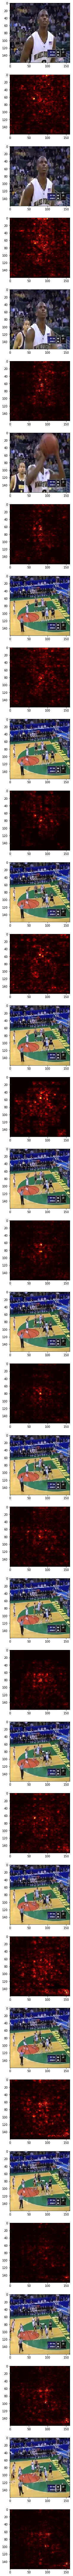

In [215]:
import torch
import torchvision
import torchvision.transforms as T
import random
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
# from cs231n.image_utils import SQUEEZENET_MEAN, SQUEEZENET_STD
from PIL import Image

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def preprocess(img, size=224):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
#         T.Normalize(mean=SQUEEZENET_MEAN.tolist(),
#                     std=SQUEEZENET_STD.tolist()),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)

def deprocess(img, should_rescale=True):
    transform = T.Compose([
        T.Lambda(lambda x: x[0]),
        T.Normalize(mean=[0, 0, 0], std=(1.0 / SQUEEZENET_STD).tolist()),
        T.Normalize(mean=(-SQUEEZENET_MEAN).tolist(), std=[1, 1, 1]),
        T.Lambda(rescale) if should_rescale else T.Lambda(lambda x: x),
        T.ToPILImage(),
    ])
    return transform(img)

def rescale(x):
    low, high = x.min(), x.max()
    x_rescaled = (x - low) / (high - low)
    return x_rescaled
    
def blur_image(X, sigma=1):
    X_np = X.cpu().clone().numpy()
    X_np = gaussian_filter1d(X_np, sigma, axis=2)
    X_np = gaussian_filter1d(X_np, sigma, axis=3)
    X.copy_(torch.Tensor(X_np).type_as(X))
    return X

def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; LongTensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()
    
    # Make input tensor require gradient
    X.requires_grad_()
    
    saliency = None
    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image. You first want to compute the loss over the correct   #
    # scores (we'll combine losses across a batch by summing), and then compute  #
    # the gradients with a backward pass.                                        #
    ##############################################################################
    # Forward pass: compute scores and loss
    scores = model(X)
    
    correct_scores = scores.gather(1, y.view(-1, 1)).squeeze()
    loss = correct_scores

    # Backward pass: PyTorch figures out which Tensors in the computational
    # graph has requires_grad=True and uses backpropagation to compute the
    # gradient of the loss with respect to these Tensors, and stores the
    # gradients in the .grad attribute of each Tensor.
    loss.backward()
    
    saliency, argmax = torch.max(torch.abs(X.grad), 1)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency


def show_saliency_maps(X, y):
    # Convert X and y from numpy arrays to Torch Tensors
    X_tensor = torch.FloatTensor(X).cuda()
    y_tensor = torch.LongTensor(y).cuda()

    # Compute saliency maps for images in X
    saliency = compute_saliency_maps(X_tensor, y_tensor, loaded_model)
    
    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    X = np.moveaxis(X[0], 0, 3)
    
    fig=plt.figure(figsize=(160, 160))
    columns = 1
    rows = 36 

    saliency = saliency.cpu().numpy()[0]
    N = 18

    for i in range(N):
        frame = X[i]
        a = fig.add_subplot(rows, columns, 2 * i + 1)
#         a.set_title('Image {}'.format(i + 1))
        plt.imshow(frame)
        
        frame = X[i]
        a = fig.add_subplot(rows, columns, 2 * i + 2)
#         a.set_title('Saliency {}'.format(i + 1))
        plt.imshow(saliency[i], cmap=plt.cm.hot)

#     plt.show()

# loaded_model = get_pretrained_C3D()

# # fine tune last 2
# for param in loaded_model.layer4.parameters():
#     param.requires_grad = True

# loaded_model = load_model(loaded_model, 'C3D-P3D199-attempt-1')

filename = 'all_data/andrew-laptop-1/video-data/2H45XQEjFQ8/clip_2.mp4'
filename = 'all_data/andrew-laptop-1/video-data/63ce3pgTihA/clip_3.mp4'
action = class_map['steal success']

video = skvideo.io.vread(filename)
video = np.moveaxis(video, 3, 0).reshape(1, 3, 18, 160, 160)
           
actions = np.array([action])

show_saliency_maps(video, actions)

In [ ]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

params = loaded_model.state_dict() 
fc_weight = params['fc.weight']

print (loaded_model)
print (fc_weight.shape)


# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
examples_per_class = 1
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

In [ ]:
# RNN
import torch
import torch.nn as nn
from torch.autograd import Variable

time_steps = 10
batch_size = 3
in_size = 5
classes_no = 11

model = nn.LSTM(in_size, classes_no, 2)
input_seq = Variable(torch.randn(time_steps, batch_size, in_size))
output_seq, _ = model(input_seq)
last_output = output_seq[-1]

loss = nn.CrossEntropyLoss()
target = Variable(torch.LongTensor(batch_size).random_(0, classes_no-1))
err = loss(last_output, target)
err.backward()

# OLD CODE SECTION, USING OLD DATA + IMAGE CLASSIFICATION

In [ ]:
# using video data
import torch.nn.functional as F  # useful stateless functions


channel_1 = 8
channel_2 = 8
num_classes = 11
learning_rate = 1e-3

conv_1 = nn.Conv3d(3, channel_1, 3, padding=1)
conv_2 = nn.Conv3d(channel_1, channel_2, 3, padding=1)

model = nn.Sequential(
    conv_1,
    nn.ReLU(),
    conv_2, 
    nn.ReLU(),
    Flatten(),
    nn.Linear(8 * 20 * 256 * 256, 20),
    nn.ReLU(),
    nn.Linear(20, 11),
)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10)

In [47]:
# write in a csv file for single image
# FOR SINGLE IMAGES
import csv
import random
import os

with open('single-image-train.csv', 'w') as train:
    with open('single-image-val.csv', 'w') as val:
        with open('single-image-test.csv', 'w') as test:
            train_writer = csv.writer(train)
            val_writer = csv.writer(val)
            test_writer = csv.writer(test)
            
            train_writer.writerow(['file', 'action'])
            val_writer.writerow(['file', 'action'])
            test_writer.writerow(['file', 'action'])

            for action, clips in events.items():
                output_class = class_map[action]
                
                for clip in clips:
                    # randomly take a clip?
                    for file in os.listdir('../resized-data-160/' + clip):
                        filename = os.fsdecode(file)
                        if not filename.endswith('.png'):
                            continue
                            
                        prob = random.random()

                        if prob < 0.85:
                            train_writer.writerow(['../resized-data-160/' + clip + '/' + filename, output_class])
                        elif prob < 0.9:
                            val_writer.writerow(['../resized-data-160/' + clip + '/' + filename, output_class])
                        else:
                            test_writer.writerow(['../resized-data-160/' + clip + '/' + filename, output_class])


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

class SingleImageBasketballDataset(Dataset):

    def __init__(self, csv_file, size, train=False, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        # randomize
        self.dataframe = pd.read_csv(csv_file)        
        self.transform = transform
        self.size = size
        self.train = train

    def __len__(self):
        # return number of rows in csv file
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        action = self.dataframe.iloc[idx, 1]
        
        # resize image
        image = np.fromfile(img_name)
        image.resize(self.size, self.size, 3)
        image = np.moveaxis(image, 2, 0)
        
        if self.transform:
            sample = self.transform(sample)

        return (image, action)

In [64]:
train_dataset = SingleImageBasketballDataset(csv_file='single-image-train.csv', size=160,
                                             train=True)
val_dataset = SingleImageBasketballDataset(csv_file='single-image-val.csv', size=160,
                                           train=True)
test_dataset = SingleImageBasketballDataset(csv_file='single-image-test.csv', size=160,
                                            train=False)

In [65]:
# couldn't normalize due to different image sizes
NUM_TRAIN = len(train_dataset)
NUM_VAL = len(val_dataset)
NUM_TEST = len(test_dataset)

print (NUM_TRAIN, NUM_VAL, NUM_TEST)

BATCH_SIZE = 16

loader_train = DataLoader(train_dataset, batch_size=BATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
loader_val = DataLoader(val_dataset, batch_size=BATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
loader_test = DataLoader(test_dataset, batch_size=BATCH_SIZE)

8754 485 1063


In [74]:
import torch.nn.functional as F  # useful stateless functions

model = nn.Sequential(
    Flatten(),
    nn.Linear(3 * 160 * 160, 20),
    nn.ReLU(),
    nn.Linear(20, 11),
)
    
learning_rate = 1e-2
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-08)

train_part34(model, optimizer, epochs=10, print_train=True)

Iteration 0, loss = 2.3852
Checking accuracy on validation set
Got 50 / 485 correct (10.31)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 100, loss = 2.4062
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 200, loss = 2.3940
Checking accuracy on validation set
Got 52 / 485 correct (10.72)
Checking accuracy on validation set
Got 840 / 8754 correct (9.60)

Iteration 300, loss = 2.3714
Checking accuracy on validation set
Got 45 / 485 correct (9.28)
Checking accuracy on validation set
Got 850 / 8754 correct (9.71)

Iteration 400, loss = 2.4039
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 500, loss = 2.3595
Checking accuracy on validation set
Got 37 / 485 correct (7.63)
Checking accuracy on validation set
Got 833 / 8754 correct (9.52)

Iteration 0, loss = 2.3155
Checking ac

KeyboardInterrupt: 

In [55]:
check_accuracy_part34(loader_test, model)

Checking accuracy on test set
Got 101 / 976 correct (10.35)


In [75]:
channel_1 = 8
channel_2 = 8
num_classes = 11
learning_rate = 1e-3

conv_1 = nn.Conv2d(3, channel_1, 3, padding=1)
conv_2 = nn.Conv2d(channel_1, channel_2, 3, padding=1)
fc = nn.Linear(channel_2 * 160 * 160, 11)

# with torch.no_grad():
#     nn.init.kaiming_normal_(conv_1.weight)
#     conv_1.bias.copy_(zero_weight(channel_1))

#     nn.init.kaiming_normal_(conv_2.weight)
#     conv_2.bias.copy_(zero_weight(channel_2))

#     nn.init.kaiming_normal_(fc.weight)
#     fc.bias.copy_(zero_weight(num_classes))

model = nn.Sequential(
    conv_1,
    nn.BatchNorm2d(channel_1),
    nn.ReLU(),
    conv_2,
    nn.BatchNorm2d(channel_2),
    nn.ReLU(),
    Flatten(),
    fc,
)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-08)
train_part34(model, optimizer, epochs=10, print_train=True)

Iteration 0, loss = 2.3974
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 100, loss = 2.3982
Checking accuracy on validation set
Got 45 / 485 correct (9.28)
Checking accuracy on validation set
Got 850 / 8754 correct (9.71)

Iteration 200, loss = 2.3836
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 300, loss = 2.3794
Checking accuracy on validation set
Got 41 / 485 correct (8.45)
Checking accuracy on validation set
Got 851 / 8754 correct (9.72)

Iteration 400, loss = 2.4096
Checking accuracy on validation set
Got 54 / 485 correct (11.13)
Checking accuracy on validation set
Got 854 / 8754 correct (9.76)

Iteration 500, loss = 2.3801
Checking accuracy on validation set
Got 41 / 485 correct (8.45)
Checking accuracy on validation set
Got 851 / 8754 correct (9.72)

Iteration 0, loss = 2.3802
Checking acc

KeyboardInterrupt: 